In [130]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [131]:
df = df.rename(columns={'Month': 'Date', '#Passengers': 'Number of passengers'})
df.head()

,Date,Number of passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [132]:
ts = df.set_index('Date')
ts.index = pd.to_datetime(ts.index)
print('Index type:', type(ts.index))
ts.head()

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Number of passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


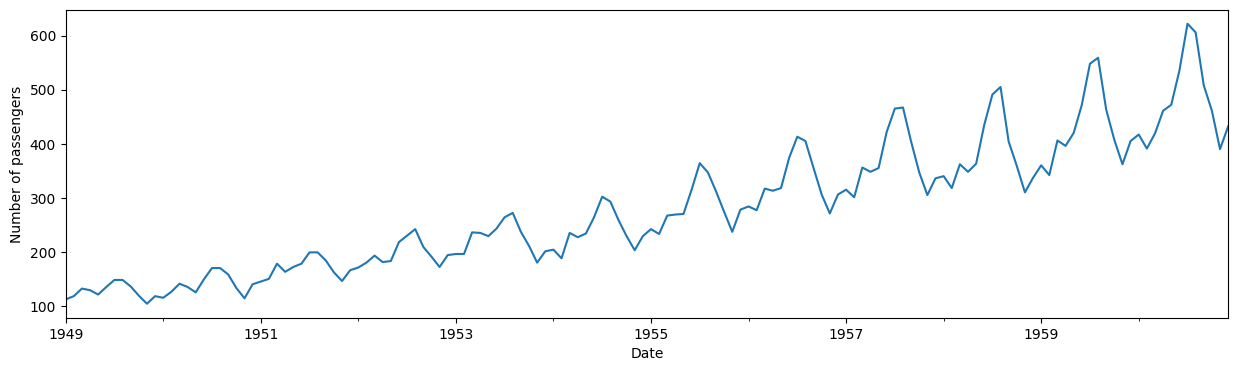

In [133]:
import matplotlib.pyplot as plt
ts['Number of passengers'].plot(figsize=(15, 4))
plt.ylabel(ts.columns[0])
plt.show()

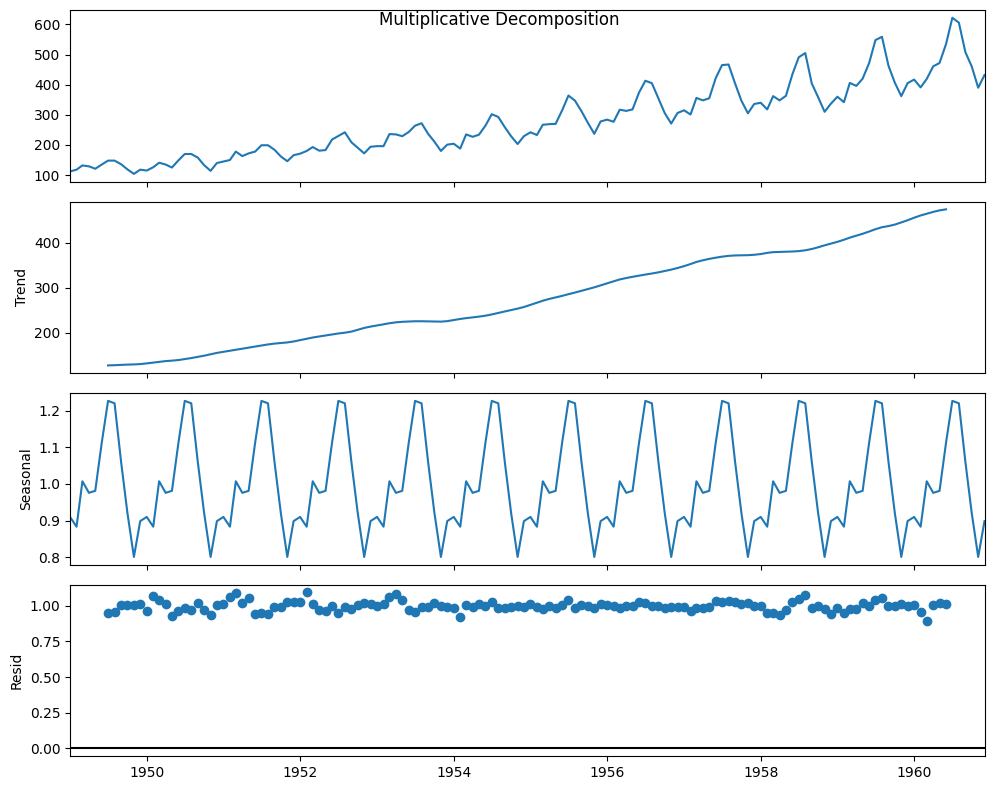

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(ts, model='multiplicative')#, period=30)

# Plot
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition')

plt.show()

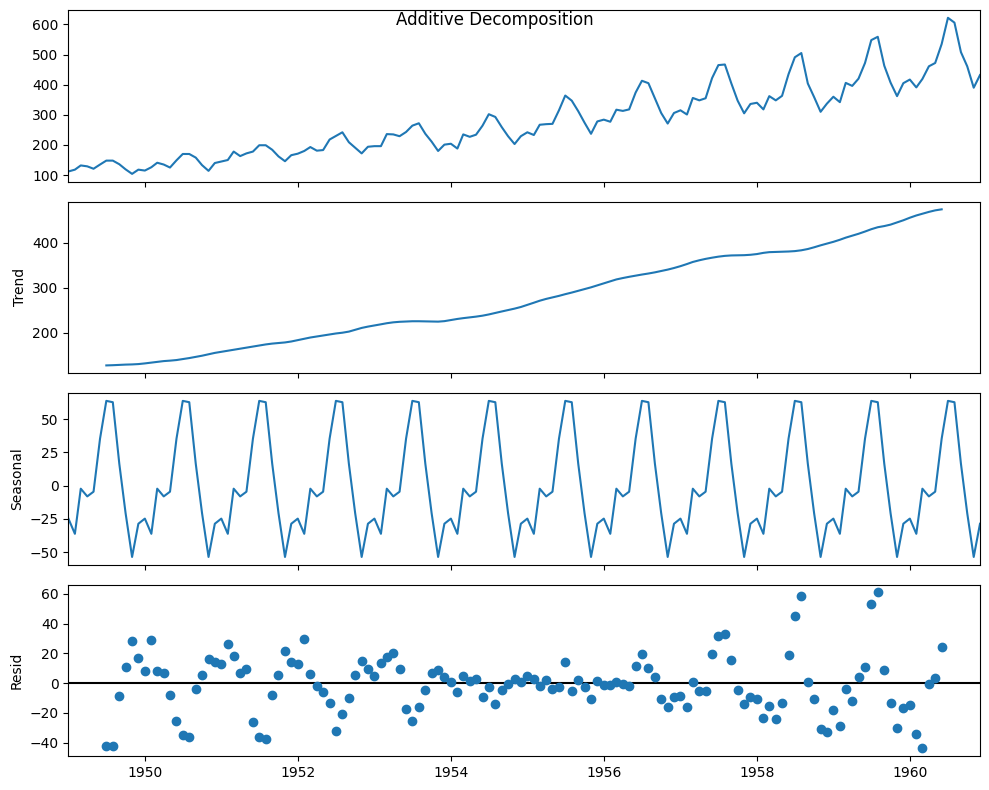

In [135]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(ts, model='additive')

# Plot
additive_decomposition.plot().suptitle('Additive Decomposition')

plt.show()

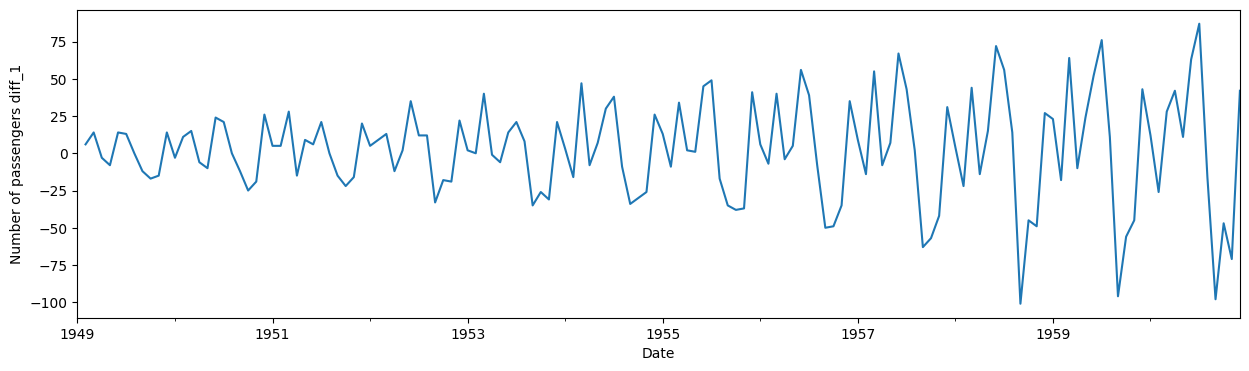

In [136]:
ts['diff_1'] = ts['Number of passengers'].diff()
ts['diff_1'].plot(figsize=(15, 4))
plt.ylabel(ts.columns[0] + ' diff_1')
plt.show()

c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


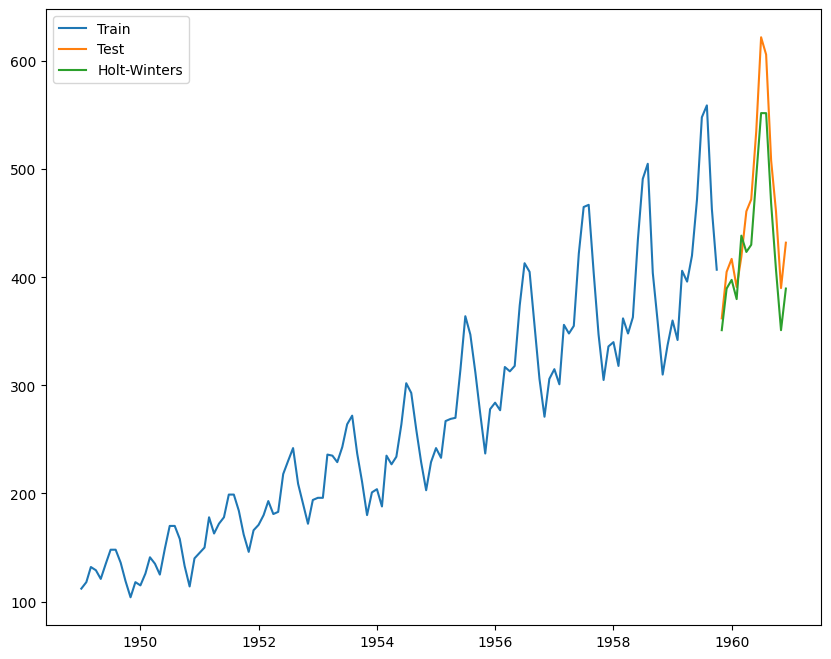

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
n = 50
train, test = ts.iloc[:130, 0], ts.iloc[130:, 0]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

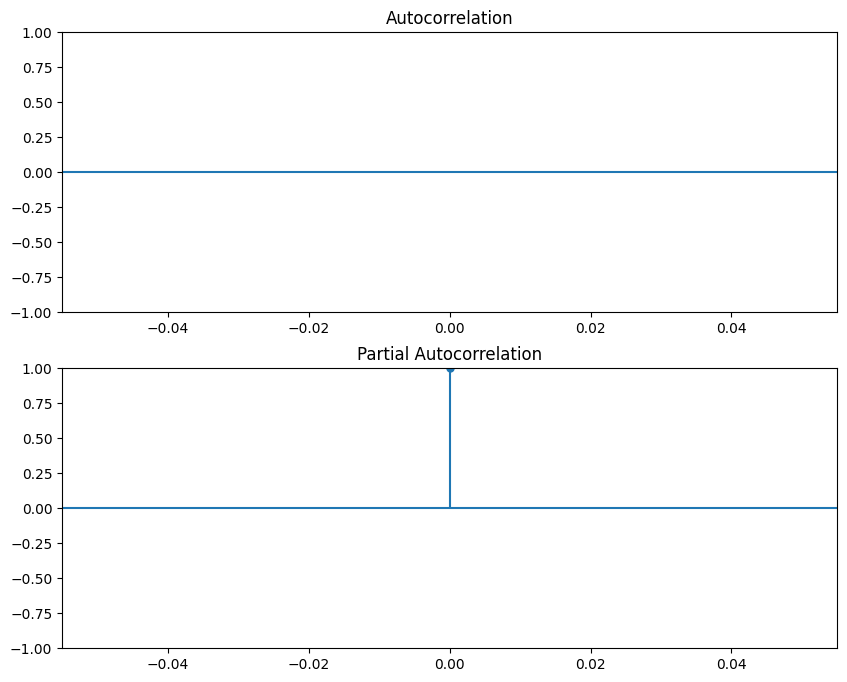

In [138]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, axs = plt.subplots(2, 1)
plot_acf(ts['Number of passengers'].diff(), axs[0])
plot_pacf(ts['Number of passengers'].diff(), axs[1])
plt.show()

In [139]:
len(ts)

144

c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found

                                SARIMAX Results                                 
Dep. Variable:     Number of passengers   No. Observations:                  110
Model:                  ARIMA(14, 0, 2)   Log Likelihood                -409.141
Date:                  Thu, 25 Apr 2024   AIC                            854.281
Time:                          14:25:33   BIC                            902.890
Sample:                      01-01-1949   HQIC                           873.997
                           - 02-01-1958                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.6835     63.758      3.649      0.000     107.720     357.647
ar.L1          0.1432      0.136      1.050      0.294      -0.124       0.410
ar.L2          0.7659      0.150    

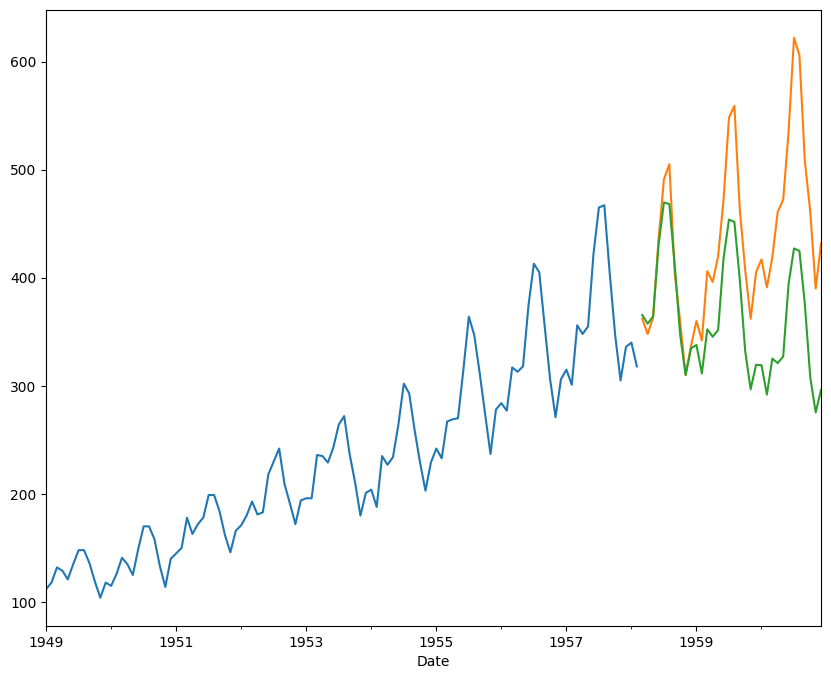

In [146]:
# from statsmodels.tsa.arima.model import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
# AR(14)
# MA(2)
train_ts = ts['Number of passengers'][:110]
test_ts = ts['Number of passengers'][110:]

model = ARIMA(train_ts, order=(14, 0, 2))
model_fit = model.fit()
test_predictions = model_fit.forecast(len(test_ts))
train_ts.plot()
test_ts.plot()
test_predictions.plot()
# summary of fit model
print(model_fit.summary())

In [141]:
import statsmodels as sm
res = sm.tools.eval_measures.meanabs(test_ts, test_predictions, axis=0)
print(res)

123.18091409386703


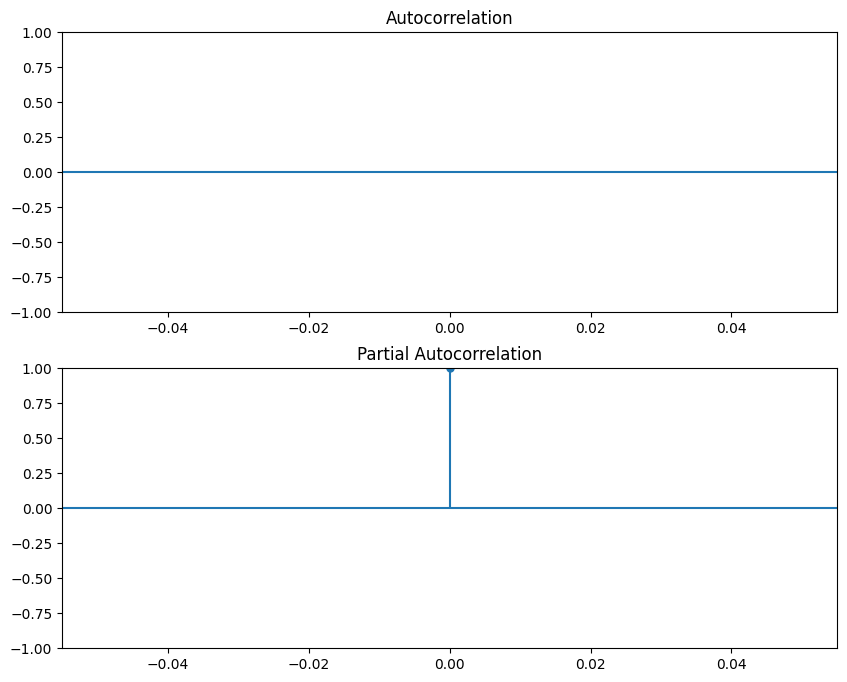

In [149]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, axs = plt.subplots(2, 1)
plot_acf(ts['Number of passengers'].diff(), axs[0])
plot_pacf(ts['Number of passengers'].diff(), axs[1])
plt.show()

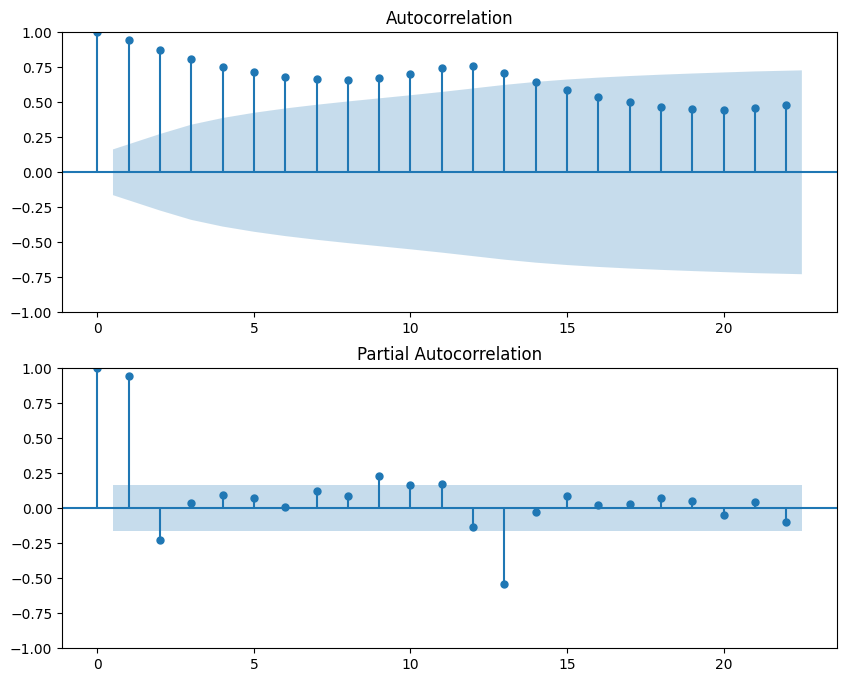

In [148]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
fig, axs = plt.subplots(2, 1)
plot_acf(ts['Number of passengers'], axs[0])
plot_pacf(ts['Number of passengers'], axs[1])
plt.show()

In [143]:
from scipy.stats import norm
import statsmodels.api as sm
# Register converters to avoid warnings
mod = sm.tsa.statespace.SARIMAX(train_ts, order=(0, 1, 1), seasonal_order=(2, 1, 1, 12))
res = mod.fit(disp=False)
print(res.summary())

c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\alfre\Desktop\Utils\RepositoriosEconometria\TimeSeries_PythonNotes\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:               Number of passengers   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -353.439
Date:                            Thu, 25 Apr 2024   AIC                            716.877
Time:                                    14:25:20   BIC                            729.751
Sample:                                01-01-1949   HQIC                           722.083
                                     - 02-01-1958                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2793      0.092     -3.029      0.002      -0.460      -0.099
ar.S.L12       0.7333      0.361   

                                SARIMAX Results                                 
Dep. Variable:     Number of passengers   No. Observations:                  110
Model:                   ARIMA(0, 1, 1)   Log Likelihood                -501.654
Date:                  Thu, 25 Apr 2024   AIC                           1007.308
Time:                          14:25:20   BIC                           1012.691
Sample:                      01-01-1949   HQIC                          1009.491
                           - 02-01-1958                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4296      0.093      4.607      0.000       0.247       0.612
sigma2       581.0948     86.495      6.718      0.000     411.568     750.621
Ljung-Box (L1) (Q):                 

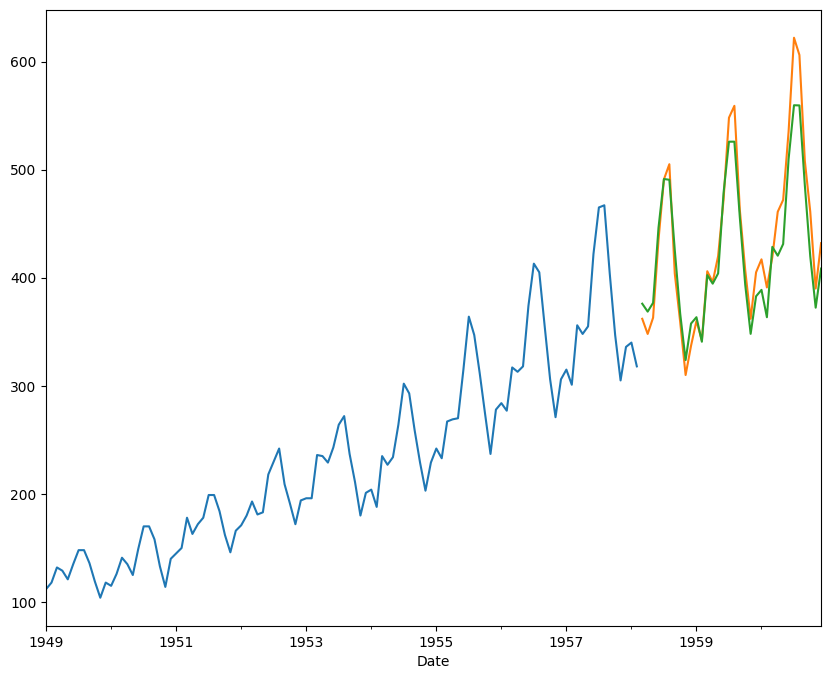

In [144]:
test_predictions = res.forecast(len(test_ts))
train_ts.plot()
test_ts.plot()
test_predictions.plot()
# summary of fit model
print(model_fit.summary())

In [145]:
import statsmodels as sm
res = sm.tools.eval_measures.meanabs(test_ts, test_predictions, axis=0)
print(res)

19.654598165171507
